In [1]:
import subprocess
import os
os.chdir(subprocess.getoutput("git rev-parse --show-toplevel"))
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from src import get_data, analysis, shape_utility, preprocess

Using TensorFlow backend.


In [3]:
term_dict = {
    'train': ['2011-01-01', '2014-12-31'],
    'valid': ['2015-01-01', '2015-12-31'],
    'test' : ['2016-01-01', '2016-12-31']
}

In [29]:
features, labels, terms = preprocess.panel2get_batch(panel, term_dict)
linear = analysis.LinearModel(features, labels, terms)
linear.inference()

{'valid': array([[-0.00932368,  0.00905303, -0.00049774, ..., -0.00660811,
        -0.00921641, -0.01021172],
       [-0.00879081, -0.00289464, -0.00437475, ..., -0.00941595,
        -0.00578402, -0.01000345],
       [-0.02335346, -0.00425179, -0.0086361 , ..., -0.0177533 ,
         0.00024522, -0.03416437],
       ..., 
       [ 0.00694977, -0.00701144,  0.02502411, ...,  0.00201913,
        -0.00714285, -0.00223467],
       [ 0.01080553,  0.00912687,  0.01236663, ...,  0.00562895,
         0.01386745,  0.00651424],
       [-0.00662407, -0.02177683, -0.01203178, ..., -0.00497262,
        -0.01066946, -0.00839971]]), 'test': array([[-0.00552737, -0.01735929, -0.00492692, ..., -0.00604943,
        -0.00801079, -0.00244251],
       [-0.02393725, -0.03983597, -0.0020816 , ..., -0.01286912,
        -0.0192179 , -0.01431342],
       [-0.00197647, -0.00162503,  0.00100477, ..., -0.00639056,
         0.00058811, -0.01073247],
       ..., 
       [ 0.00147864, -0.00399086,  0.00794926, ..., -0

whole accuracy is 0.809


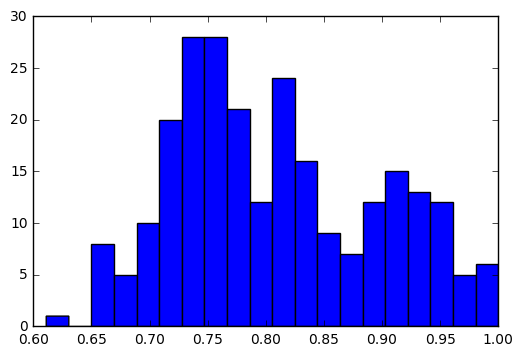

In [6]:
linear.plot_direction_accuracy(data_key='valid')

whole profit ration is 1.01


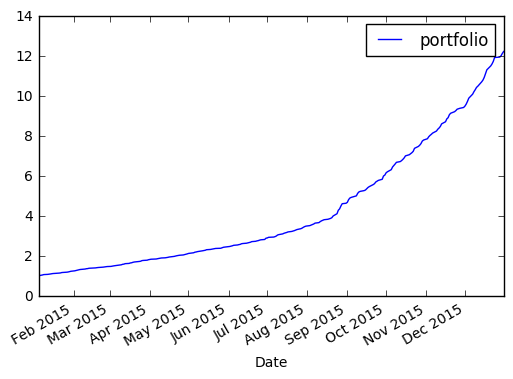

In [8]:
linear.plot_profit()